## Intro
Summarize CT^2 and Bertrant, Maybe Pea as well


In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
% matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib notebook
import seaborn as sns
from IPython.display import display
import pprint as pp
import helpers # written by us for MMLA pipeline purposes
import mglearn

In [2]:
#df = pd.read_csv("skeleton1.csv", delimiter=";")


# [x] Set up skeleton_df
skeleton_df = pd.read_csv('kinectSkeleton.csv', sep=';', names=helpers.col_names())

In [3]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(skeleton_df)
print(kmeans.labels_)
#kmeans.predict([[unseen data goes here]])
kmeans.cluster_centers_

[1 1 6 ..., 2 2 2]


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.79712000e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.80000000e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.08286713e-11,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.80000000e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.79951541e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.80000000e+02,   0.00000000e+00,   0.00000000e+00]])

<IPython.core.display.Javascript object>


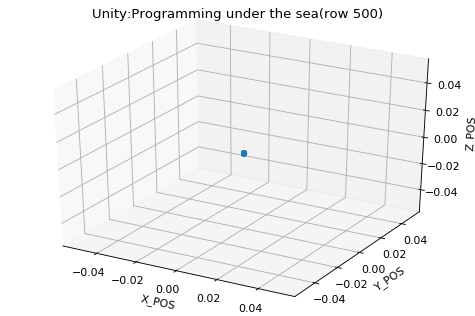

In [4]:
plt.hist(kmeans.labels_)
plt.xlabel('Cluster #')
plt.ylabel('Count')
#plt.show()

In [5]:
# [x] Set up dataframe of XYZ position columns
kinect_xyz_df = helpers.create_xyz_df(skeleton_df)

In [6]:
kinect_xyz_df['ClusterLabel'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
kinect_xyz_df.head()

,HIP_CENTER_POS_X_P1,HIP_CENTER_POS_Y_P1,HIP_CENTER_POS_Z_P1,SPINE_POS_X_P1,SPINE_POS_Y_P1,SPINE_POS_Z_P1,SHOULDER_CENTER_POS_X_P1,SHOULDER_CENTER_POS_Y_P1,SHOULDER_CENTER_POS_Z_P1,HEAD_POS_X_P1,HEAD_POS_Y_P1,HEAD_POS_Z_P1,SHOULDER_LEFT_POS_X_P1,SHOULDER_LEFT_POS_Y_P1,SHOULDER_LEFT_POS_Z_P1,ELBOW_LEFT_POS_X_P1,ELBOW_LEFT_POS_Y_P1,ELBOW_LEFT_POS_Z_P1,WRIST_LEFT_POS_X_P1,WRIST_LEFT_POS_Y_P1,WRIST_LEFT_POS_Z_P1,HAND_LEFT_POS_X_P1,HAND_LEFT_POS_Y_P1,HAND_LEFT_POS_Z_P1,SHOULDER_RIGHT_POS_X_P1,SHOULDER_RIGHT_POS_Y_P1,SHOULDER_RIGHT_POS_Z_P1,ELBOW_RIGHT_POS_X_P1,ELBOW_RIGHT_POS_Y_P1,ELBOW_RIGHT_POS_Z_P1,WRIST_RIGHT_POS_X_P1,WRIST_RIGHT_POS_Y_P1,WRIST_RIGHT_POS_Z_P1,HAND_RIGHT_POS_X_P1,HAND_RIGHT_POS_Y_P1,HAND_RIGHT_POS_Z_P1,HIP_LEFT_POS_X_P1,HIP_LEFT_POS_Y_P1,HIP_LEFT_POS_Z_P1,KNEE_LEFT_POS_X_P1,KNEE_LEFT_POS_Y_P1,KNEE_LEFT_POS_Z_P1,ANKLE_LEFT_POS_X_P1,ANKLE_LEFT_POS_Y_P1,ANKLE_LEFT_POS_Z_P1,FOOT_LEFT_POS_X_P1,FOOT_LEFT_POS_Y_P1,FOOT_LEFT_POS_Z_P1,HIP_RIGHT_POS_X_P1,HIP_RIGHT_POS_Y_P1,HIP_RIGHT_POS_Z_P1,KNEE_RIGHT_POS_X_P1,KNEE_RIGHT_POS_Y_P1,KNEE_RIGHT_POS_Z_P1,ANKLE_RIGHT_POS_X_P1,ANKLE_RIGHT_POS_Y_P1,ANKLE_RIGHT_POS_Z_P1,FOOT_RIGHT_POS_X_P1,FOOT_RIGHT_POS_Y_P1,FOOT_RIGHT_POS_Z_P1,HIP_CENTER_POS_X_P2,HIP_CENTER_POS_Y_P2,HIP_CENTER_POS_Z_P2,SPINE_POS_X_P2,SPINE_POS_Y_P2,SPINE_POS_Z_P2,SHOULDER_CENTER_POS_X_P2,SHOULDER_CENTER_POS_Y_P2,SHOULDER_CENTER_POS_Z_P2,HEAD_POS_X_P2,HEAD_POS_Y_P2,HEAD_POS_Z_P2,SHOULDER_LEFT_POS_X_P2,SHOULDER_LEFT_POS_Y_P2,SHOULDER_LEFT_POS_Z_P2,ELBOW_LEFT_POS_X_P2,ELBOW_LEFT_POS_Y_P2,ELBOW_LEFT_POS_Z_P2,WRIST_LEFT_POS_X_P2,WRIST_LEFT_POS_Y_P2,WRIST_LEFT_POS_Z_P2,HAND_LEFT_POS_X_P2,HAND_LEFT_POS_Y_P2,HAND_LEFT_POS_Z_P2,SHOULDER_RIGHT_POS_X_P2,SHOULDER_RIGHT_POS_Y_P2,SHOULDER_RIGHT_POS_Z_P2,ELBOW_RIGHT_POS_X_P2,ELBOW_RIGHT_POS_Y_P2,ELBOW_RIGHT_POS_Z_P2,WRIST_RIGHT_POS_X_P2,WRIST_RIGHT_POS_Y_P2,WRIST_RIGHT_POS_Z_P2,HAND_RIGHT_POS_X_P2,HAND_RIGHT_POS_Y_P2,HAND_RIGHT_POS_Z_P2,HIP_LEFT_POS_X_P2,HIP_LEFT_POS_Y_P2,HIP_LEFT_POS_Z_P2,KNEE_LEFT_POS_X_P2,KNEE_LEFT_POS_Y_P2,KNEE_LEFT_POS_Z_P2,ANKLE_LEFT_POS_X_P2,ANKLE_LEFT_POS_Y_P2,ANKLE_LEFT_POS_Z_P2,FOOT_LEFT_POS_X_P2,FOOT_LEFT_POS_Y_P2,FOOT_LEFT_POS_Z_P2,HIP_RIGHT_POS_X_P2,HIP_RIGHT_POS_Y_P2,HIP_RIGHT_POS_Z_P2,KNEE_RIGHT_POS_X_P2,KNEE_RIGHT_POS_Y_P2,KNEE_RIGHT_POS_Z_P2,ANKLE_RIGHT_POS_X_P2,ANKLE_RIGHT_POS_Y_P2,ANKLE_RIGHT_POS_Z_P2,FOOT_RIGHT_POS_X_P2,FOOT_RIGHT_POS_Y_P2,FOOT_RIGHT_POS_Z_P2,ClusterLabel
0,0,0,0,0,0,0,-0.287042,0.109208,1.312098,-0.249627,0.278203,1.302606,-0.395559,-0.020150,1.266056,-0.441303,-0.192975,1.178452,-0.397443,-0.313153,0.984611,-0.382823,-0.353212,0.923300,-0.127764,-0.017687,1.255086,-0.145647,-0.178497,1.189137,-0.292339,-0.249892,1.020284,-0.341911,-0.285920,0.984030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,-0.286543,0.109445,1.311690,-0.250068,0.278273,1.301877,-0.396819,-0.019422,1.266055,-0.441803,-0.192092,1.178703,-0.397745,-0.313512,0.984217,-0.383060,-0.353986,0.922688,-0.128245,-0.018764,1.255932,-0.057441,-0.227389,1.255475,-0.208439,-0.265185,1.078274,-0.268434,-0.292294,1.049632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,-0.287195,0.109259,1.311503,-0.250520,0.278218,1.301287,-0.397889,-0.019008,1.265737,-0.442228,-0.191796,1.178485,-0.397901,-0.313772,0.983873,-0.383125,-0.354430,0.922300,-0.128831,-0.019384,1.256447,-0.057429,-0.227255,1.255237,-0.202959,-0.264821,1.072396,-0.264520,-0.289737,1.043815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,

In [7]:
# [x] Plotting a point cloud for a specific row of Kinect data
#cluster0 = kinect_xyz_df.loc[kinect_xyz_df['ClusterLabel'] == 0]
#the0row = cluster0.sample(n=1)
row = kinect_xyz_df.iloc[50000]

#cluster0 = kinect_xyz_df.loc[kinect_xyz_df['ClusterLabel'] == 0]
#row = cluster0.sample(n=1)
row_triples = helpers.xyz_triples(row)
helpers.plot_xyz_triples(row_triples, title='Unity:Programming under the sea(row 500)')

# [ ] TODO: plotting lines between joints
# [ ] TODO: rotateable/draggable 3D axes

In [9]:
cluster_item = [500,50000,35000,65000,37000]

Once we have the header for the Kinect data we can follow up on what body positions these clusters correspond to and try

(1) Find average of position of each skelton.joint.cluster
(2) Visualization of joint.clusters 
(3) Markov state transition diagram of those body positions
(4) label all data points according to their cluster, name those clusters and something like "active", "passive" "happy".


In [8]:
# Now just need to label coloumns 
# of df with the kmeans_labels_values
skeleton_df['ClusterLabel'] = kmeans.labels_
#skeleton_df

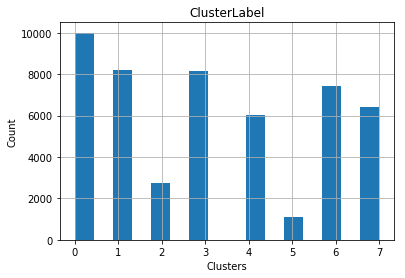

In [9]:
%matplotlib inline
x = skeleton_df.column='ClusterLabel'
skeleton_df.hist(x, normed=False, bins=16)
plt.ylabel('Count');
plt.xlabel('Clusters');

In [ ]:
# X, y = mglearn.datasets.make_forge()

# mglearn.discrete_scatter(X[:,0],X[:,1], y)
# plt.legend(["Class 0", "Class 1"], loc=4)
# plt.xlabel("First feature")
# plt.ylabel("Second feature")
# print("X.shape: {}".format(X.shape))

In [ ]:
# mglearn.datasets.make_forge()

In [ ]:
# kinect_xyz_df

In [ ]:
# skeleton_df['ClusterLabel']

In [ ]:
# from matplotlib import pyplot
# % matplotlib inline 
# P = skeleton_df #np.matrix([[1., 0., 0., 0., 0., 0.],
#     #           [1./4, 1./2, 0., 1./4, 0., 0.],
#     #           [0., 0., 0., 1., 0., 0.],
#     #           [1./16, 1./4, 1./8, 1./4, 1./4, 1./16],
#     #           [0., 0., 0., 1./4, 1./2, 1./4],
#     #           [0., 0., 0., 0., 0., 1.]])

# #v = np.matrix([[0,1,2,3,4,5,6,7]])

# v = skeleton_df['ClusterLabel']

# # Get the data
# plot_data = []
# for step in skeleton_df.index:
#     result = v * P**step
#     plot_data.append(np.array(result).flatten())

# # Convert the data format
# plot_data = np.array(plot_data)

# # Create the plot
# pyplot.figure(1)
# pyplot.xlabel('Steps')
# pyplot.ylabel('Probability')
# lines = []
# for i, shape in zip(range(58313), ['x', 'h', 'H', 's', '8', 'r+']):
#     line, = pyplot.plot(plot_data[:, i], shape, label="Cluster%i" % (i))
#     lines.append(line)
# pyplot.legend(handles=lines, loc=1)
# pyplot.show()

In [ ]:
# import collections
# a = kinect_xyz_df['ClusterLabel']
# counter=collections.Counter(a)
# print(counter)

# print(counter.values())
# # [4, 4, 2, 1, 2]
# print(counter.keys())
# # [1, 2, 3, 4, 5]
# print(counter.most_common(3))
# # [(1, 4), (2, 4), (3, 2)]

In [20]:
# PairOccurrences = {}
# print(range(8))

In [21]:
# for a in range(8):
#     for b in range(8):
#         PairOccurrences[a,b] = 0
# print (PairOccurrences)

In [23]:
# for c in range (1,len(kinect_xyz_df.index)-2):
#     PairOccurences [kinect_xyz_df.iloc[c]['ClusterLabel'],kinect_xyz_df.iloc[c+1]['ClusterLabel']] +=1 

In [22]:
# kinect_xyz_df.iloc[1]

In [25]:
# print(PairOccurences)

In [10]:
PairOccurrences = {}
for a in range(8):
    for b in range(8):
        PairOccurrences[a,b] = 0
        
for c in range (0,len(kinect_xyz_df.index)-2):
    PairOccurrences[int(kinect_xyz_df.iloc[c]['ClusterLabel']),int(kinect_xyz_df.iloc[c+1]['ClusterLabel'])] +=1 

num_transitions = sum(PairOccurrences.values())
transitionFrequencies = {}
for k in PairOccurrences.keys():
    transitionFrequencies[k] = PairOccurrences[k] / num_transitions * 100

In [28]:
pp.pprint(transitionFrequencies)

{(0, 0): 11.390646704738385,
 (0, 1): 0.012004596045343074,
 (0, 2): 0.47332407264495546,
 (0, 3): 0.0017149422921918678,
 (0, 4): 0.43902522680111816,
 (0, 5): 0.008574711460959339,
 (0, 6): 0.07888734544082592,
 (0, 7): 4.724666014988595,
 (1, 0): 0.006859769168767471,
 (1, 1): 20.934300560786127,
 (1, 2): 0.02229424979849428,
 (1, 3): 0.0017149422921918678,
 (1, 4): 0.020579307506302415,
 (1, 5): 0.0,
 (1, 6): 0.006859769168767471,
 (1, 7): 0.029154018967261754,
 (2, 0): 0.4613194765996124,
 (2, 1): 0.025724134382878017,
 (2, 2): 14.295758947711409,
 (2, 3): 0.0017149422921918678,
 (2, 4): 0.2435218054912452,
 (2, 5): 0.0,
 (2, 6): 0.07031263397986658,
 (2, 7): 0.7099861089674332,
 (3, 0): 0.0017149422921918678,
 (3, 1): 0.0017149422921918678,
 (3, 2): 0.0,
 (3, 3): 4.067843117079111,
 (3, 4): 0.0034298845843837356,
 (3, 5): 0.010289653753151207,
 (3, 6): 0.0,
 (3, 7): 0.008574711460959339,
 (4, 0): 0.42702063075577507,
 (4, 1): 0.029154018967261754,
 (4, 2): 0.22122755569275093,
 (

### Visualizing skeletons

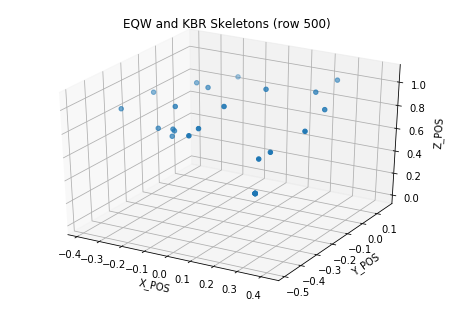

In [11]:
row = kinect_xyz_df.iloc[500]
row_triples = helpers.xyz_triples(row)

fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter(row_triples['X_POS'], row_triples['Y_POS'], row_triples['Z_POS'])
ax.set_xlabel('X_POS')
ax.set_ylabel('Y_POS')
ax.set_zlabel('Z_POS')
ax.set_title('EQW and KBR Skeletons (row 500)')

def draw_line(ax, a, b):    
    x = np.linspace(a[0], b[0], 100)
    y = np.linspace(a[1], b[1], 100)
    z = np.linspace(a[2], b[2], 100)
    ax.plot(x, y, z)
    
# draw_line(ax, [0, 0, 0], [10, 10, 10])

In [12]:
# [] Drop all the lower body positions before clustering/analyzing

# TODO: put into helpers.py eventually

UPPER_PARTS = ['SHOULDER', 'HEAD', 'ELBOW', 'WRIST', 'HAND'] 
UPPER_PARTS_COLS = []

for c in skeleton_df.columns.values.tolist():
    for part in UPPER_PARTS:
        if ('POS' in c) and (part in c) and ('CONF' not in c):
            UPPER_PARTS_COLS.append(c)
            
# pp.pprint(UPPER_PARTS_COLS)
# row[['HIP_CENTER_POS_X_P1', 'ELBOW_LEFT_POS_X_P1']]
# ...CONF is confidence yes? 

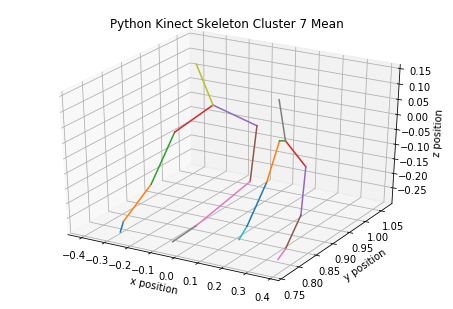

In [43]:
skeleton_df_upper = skeleton_df[UPPER_PARTS_COLS]
test_row = cluster1centroid

JOINT_PAIRS = [
                ['WRIST_LEFT', 'HAND_LEFT'],
                ['WRIST_LEFT', 'ELBOW_LEFT'],
                ['ELBOW_LEFT', 'SHOULDER_LEFT'],
                ['SHOULDER_LEFT', 'SHOULDER_CENTER'],
                ['SHOULDER_CENTER', 'SHOULDER_RIGHT'],
                ['ELBOW_RIGHT', 'SHOULDER_RIGHT'],
                ['WRIST_RIGHT', 'ELBOW_RIGHT'],
                ['WRIST_RIGHT', 'HAND_RIGHT'],
                ['SHOULDER_CENTER', 'HEAD'],
              ]

def plot_skeleton(ax, row):
    # expecting row to be from a dataframe with UPPER_PARTS_COLS values
    
    for person in ['P1', 'P2']:
        for jp in JOINT_PAIRS:
#             print(jp[0]+'_POS_X_'+person)
#             print([row[jp[0]+'_POS_X_'+person], row[jp[0]+'_POS_Y_'+person], row[jp[0]+'_POS_Z_'+person]])
            draw_line(ax, [row[jp[0]+'_POS_X_'+person], row[jp[0]+'_POS_Z_'+person], row[jp[0]+'_POS_Y_'+person]], 
                          [row[jp[1]+'_POS_X_'+person], row[jp[1]+'_POS_Z_'+person], row[jp[1]+'_POS_Y_'+person]])
                
    # e.g. elbow to wrist
#     draw_line(ax, [row['WRIST_LEFT_POS_X_P1'], row['WRIST_LEFT_POS_Y_P1'], row['WRIST_LEFT_POS_Z_P1']], 
#                   [row['ELBOW_LEFT_POS_X_P1'], row['ELBOW_LEFT_POS_Y_P1'], row['ELBOW_LEFT_POS_Z_P1']])
    
    return 

# print([row['WRIST_LEFT_POS_X_P1'], row['WRIST_LEFT_POS_Y_P1'], row['WRIST_LEFT_POS_Z_P1']])

fig = plt.figure(5)
ax = Axes3D(fig)
plot_skeleton(ax, test_row)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('z position')
ax.set_title('Python Kinect Skeleton Cluster 7 Mean')
plt.savefig('Python Kinect Skeleton Cluster 7 Mean.jpg', dpi=300)
plt.show()

Cluster 7 = hands out passive

In [42]:
# Group by cluster for individual cluster analysis
clusters = skeleton_df.groupby('ClusterLabel')
cluster1 = clusters.get_group(7)
cluster1centroid = cluster1.mean()
# Eventually we can visualize this
# Perhaps this gets us the most prevalent positions... 

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(transitionFrequencies, labels=None, graph_layout='shell',
               node_size=7000, node_color='pink', node_alpha=0.3,
               node_text_size=40,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in transitionFrequencies.keys():
        G.add_edge(edge[0],edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)      
    nx.draw_networkx_edge_labels(G, 
                                 graph_pos, 
                                 edge_labels=transitionFrequencies, 
                                 label_pos=edge_text_pos,
                                 font_size=24)
    plt.show()

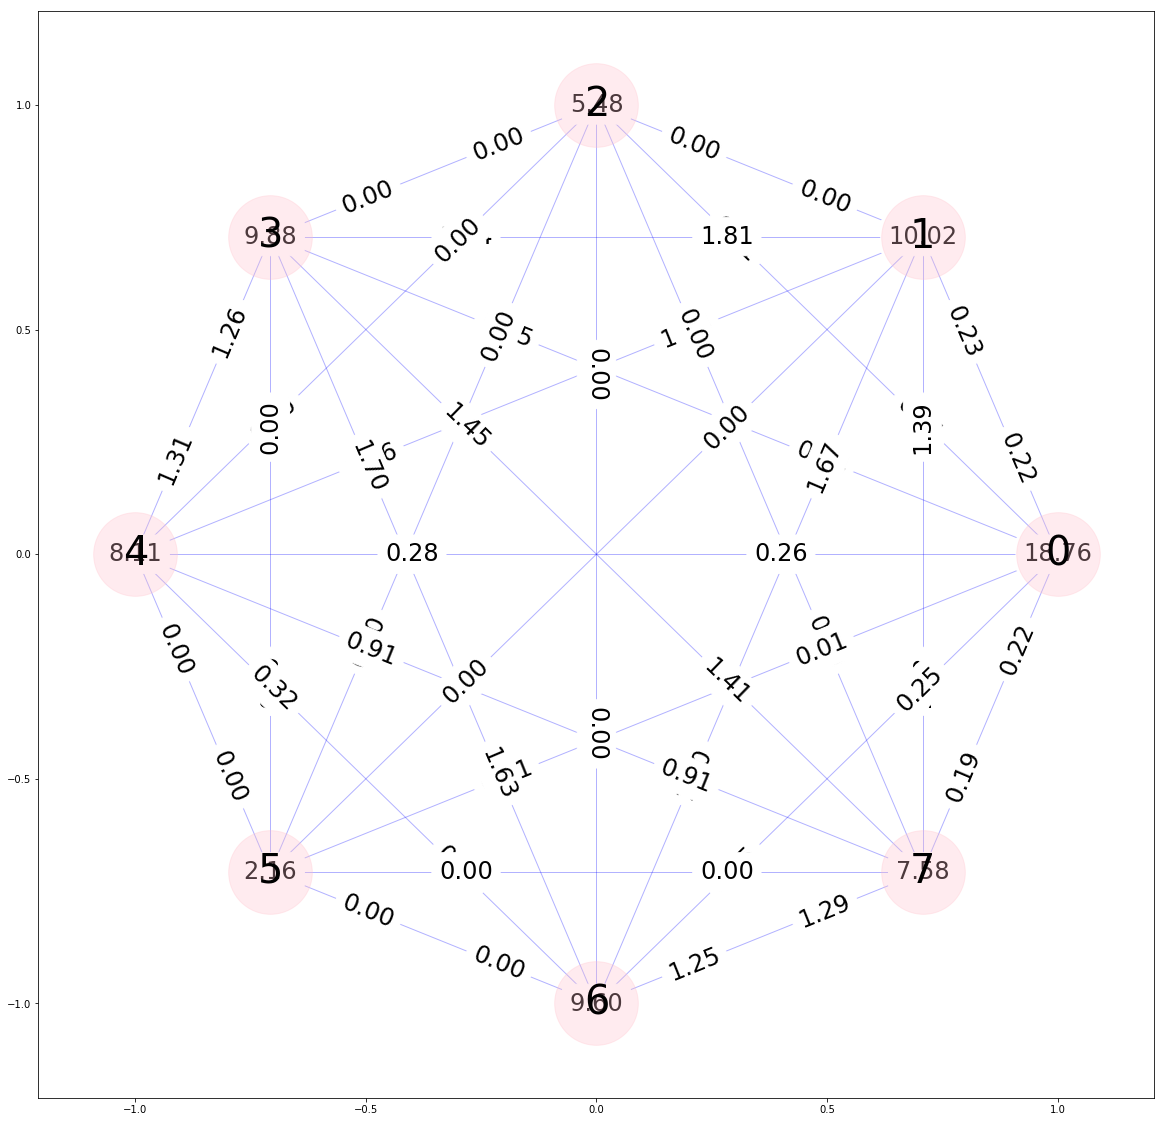

In [55]:
PairOccurrences = {}
for a in range(8):
    for b in range(8):
        PairOccurrences[a,b] = 0
        
for c in range (0,len(kinect_xyz_df.index)-2):
    PairOccurrences[int(kinect_xyz_df.iloc[c]['ClusterLabel']),
                    int(kinect_xyz_df.iloc[c+1]['ClusterLabel'])] +=1 

num_transitions = sum(PairOccurrences.values())
transitionFrequencies = {}
for k in PairOccurrences.keys():
    transitionFrequencies[k] = format(PairOccurrences[k] / num_transitions * 100, '.2f')
plt.figure(figsize=(20,20))
draw_graph(transitionFrequencies)